## Imorting the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("bike_buyers_clean.csv")

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
df.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No
999,12121,Single,Male,60000,3,High School,Professional,Yes,2,10+ Miles,North America,53,Yes


In [ ]:
df.shape

(1000, 13)

In [ ]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of         ID Marital Status  Gender  Income  Children        Education  \
0    12496        Married  Female   40000         1        Bachelors   
1    24107        Married    Male   30000         3  Partial College   
2    14177        Married    Male   80000         5  Partial College   
3    24381         Single    Male   70000         0        Bachelors   
4    25597         Single    Male   30000         0        Bachelors   
..     ...            ...     ...     ...       ...              ...   
995  23731        Married    Male   60000         2      High School   
996  28672         Single    Male   70000         4  Graduate Degree   
997  11809        Married    Male   60000         2        Bachelors   
998  19664         Single    Male  100000         3        Bachelors   
999  12121         Single    Male   60000         3      High School   

         Occupation Home Owner  Cars Commute Distance         Region  Age  \
0    Skilled Manual       

In [ ]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [ ]:
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

There are no null values. Hence we do not have to handle the missing values.

In [ ]:
df[df.duplicated()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


No duplicate values found. Hence we are not handling them

<AxesSubplot:>

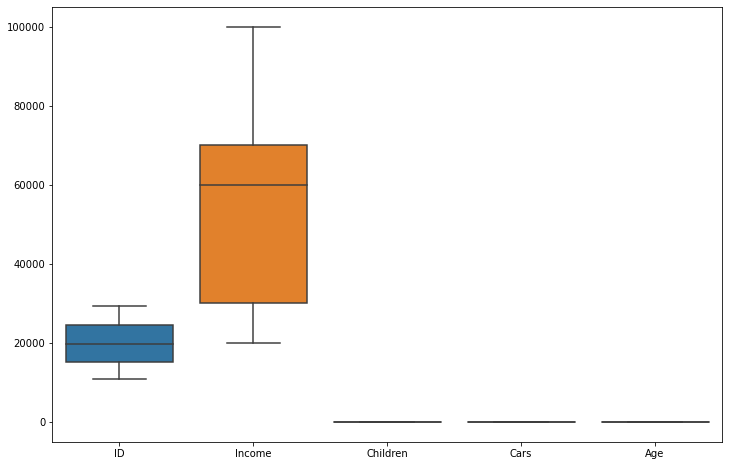

In [ ]:
plt.figure(figsize=(12,8)) # Set the Width & Height
sns.boxplot(data=df[['ID', 'Income', 'Children', 'Cars', 'Age','Purchased Bike']])

Above boxplot gives us information that Income, Cars & Age are having outliers

In [ ]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)


    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in [ 'Income', 'Cars', 'Age']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Income attribute : [150000, 150000, 150000, 150000, 160000, 160000, 160000, 170000, 170000, 170000]
Outliers in Cars attribute : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Outliers in Age attribute : [78, 78, 80, 89]


Since Income, Cars & Age are having outliers therefore handling them below.

In [ ]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in [ 'Income', 'Cars', 'Age']:
    df[i]=handle_outliers(df[i])

Verifying them again using box plot

<AxesSubplot:>

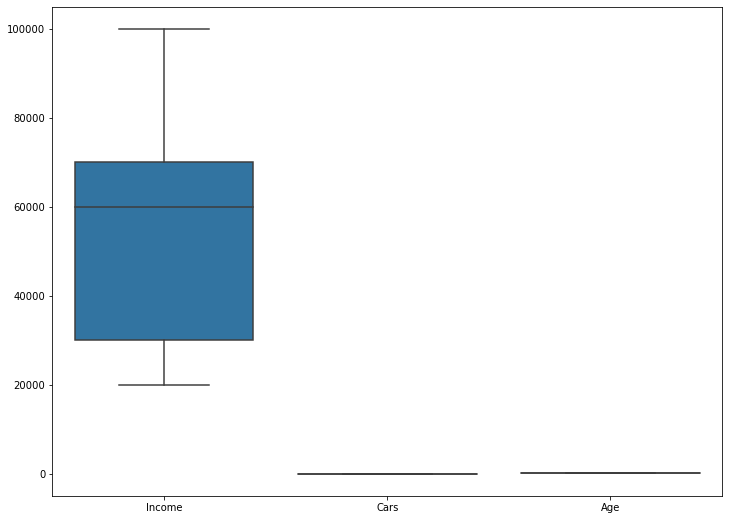

In [ ]:

plt.figure(figsize=(12,9))
sns.boxplot(data=df[[ 'Income', 'Cars', 'Age']])

## Encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5,3,3,0,2.0,3,0,60.0,0
3,24381,1,1,70000.0,0,0,3,1,1.0,4,2,41.0,1
4,25597,1,1,30000.0,0,0,0,0,0.0,0,0,36.0,1


In [ ]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Marital Status']= label_encoder.fit_transform(df['Marital Status'])
df['Purchased Bike']= label_encoder.fit_transform(df['Purchased Bike'])
df['Occupation']= label_encoder.fit_transform(df['Occupation'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Home Owner']= label_encoder.fit_transform(df['Home Owner'])
df['Region']= label_encoder.fit_transform(df['Region'])
df['Commute Distance']= label_encoder.fit_transform(df['Commute Distance'])

df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5,3,3,0,2.0,3,0,60.0,0
3,24381,1,1,70000.0,0,0,3,1,1.0,4,2,41.0,1
4,25597,1,1,30000.0,0,0,0,0,0.0,0,0,36.0,1


In [ ]:
df.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
995,23731,0,1,60000.0,2,2,3,1,2.0,3,1,54.0,1
996,28672,1,1,70000.0,4,1,3,1,0.0,3,1,35.0,1
997,11809,0,1,60000.0,2,0,4,1,0.0,0,1,38.0,1
998,19664,1,1,100000.0,3,0,1,0,3.0,1,1,38.0,0
999,12121,1,1,60000.0,3,2,3,1,2.0,2,1,53.0,1


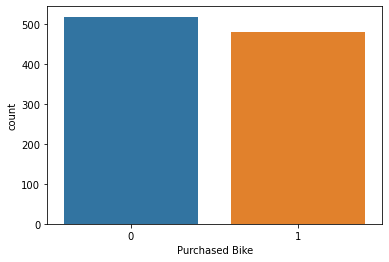

In [ ]:
sns.countplot(x='Purchased Bike',data=df)
plt.show()

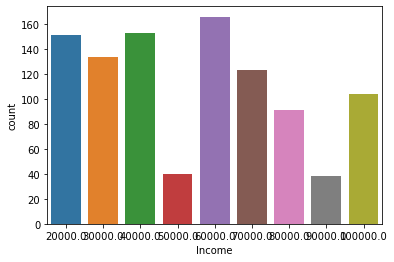

In [ ]:
sns.countplot(x='Income',data=df)
plt.show()

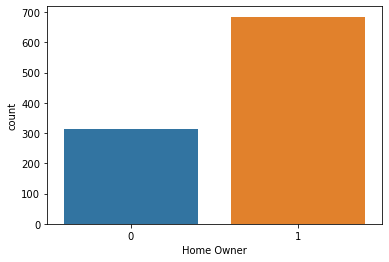

In [ ]:
sns.countplot(x='Home Owner',data=df)
plt.show()

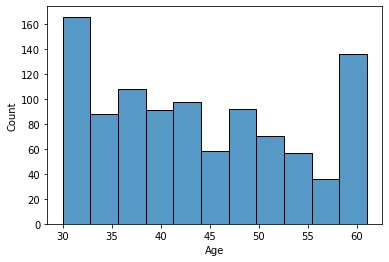

In [ ]:
sns.histplot(df.Age)
plt.show()

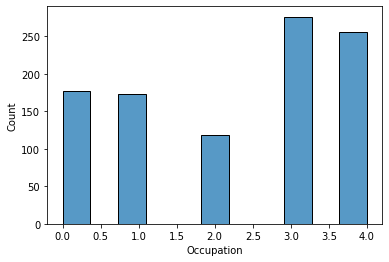

In [ ]:
sns.histplot(df.Occupation)
plt.show()

<AxesSubplot:xlabel='Purchased Bike', ylabel='Age'>

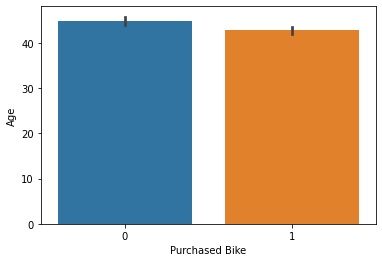

In [ ]:
sns.barplot(x='Purchased Bike',y='Age',data=df)

<AxesSubplot:xlabel='Purchased Bike', ylabel='Income'>

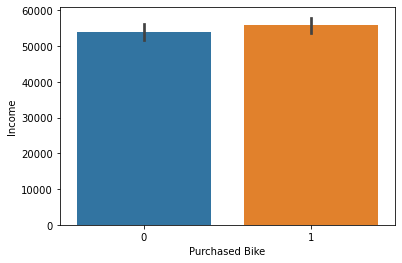

In [ ]:
sns.barplot(x='Purchased Bike',y='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

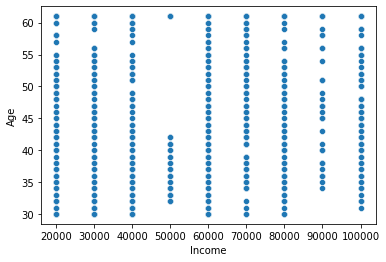

In [ ]:
sns.scatterplot(x='Income',y='Age',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

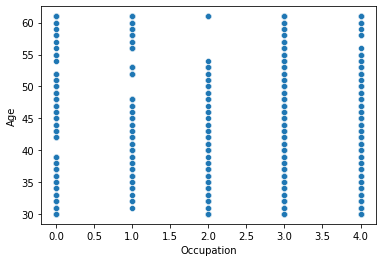

In [ ]:
sns.scatterplot(x='Occupation',y='Age',data=df)

Text(0.5, 1.0, 'Correlation map')

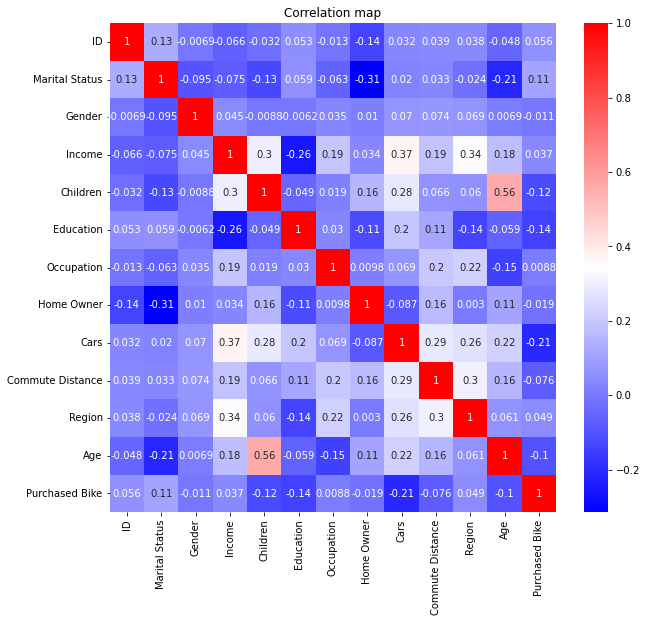

In [ ]:
plt.figure(figsize=(10,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

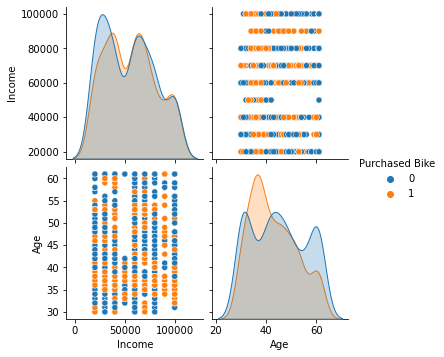

In [ ]:
sns.pairplot(df[['Income','Age','Purchased Bike']],hue='Purchased Bike')

In [ ]:
from sklearn.preprocessing import StandardScaler  # Standarization
# from sklearn.preprocessing import MinMaxScaler  # Normalization

scale = StandardScaler()
# scale = MinMaxScaler()
df[['Income','Age']]=scale.fit_transform(df[['Income','Age']])

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,-0.581693,1,0,4,1,0.0,0,0,-0.189602,0
1,24107,0,1,-0.973934,3,3,0,1,1.0,0,0,-0.089548,0
2,14177,0,1,0.987271,5,3,3,0,2.0,3,0,1.611371,0
3,24381,1,1,0.595030,0,0,3,1,1.0,4,2,-0.289656,1
4,25597,1,1,-0.973934,0,0,0,0,0.0,0,0,-0.789927,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_cols = ['Cars','Age','Marital Status','Children','Education']
X = df[feature_cols]
y = df['Purchased Bike']

In [ ]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased Bike, Length: 1000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(800, 5)

In [ ]:
 X_test.shape

(200, 5)

## Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[57 40]
 [54 49]]


In [ ]:
print(accuracy_score(y_test,pred))

0.53


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55        97
           1       0.55      0.48      0.51       103

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



In [ ]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)

In [ ]:
accuracy_rate

[0.535,
 0.53,
 0.53,
 0.545,
 0.55,
 0.58,
 0.595,
 0.585,
 0.595,
 0.58,
 0.605,
 0.59,
 0.605,
 0.595,
 0.61,
 0.625,
 0.62,
 0.62,
 0.63,
 0.605,
 0.63,
 0.62,
 0.63,
 0.63,
 0.62,
 0.635,
 0.625,
 0.63,
 0.62,
 0.62,
 0.635,
 0.625,
 0.625,
 0.63,
 0.63,
 0.615,
 0.615,
 0.62,
 0.62]

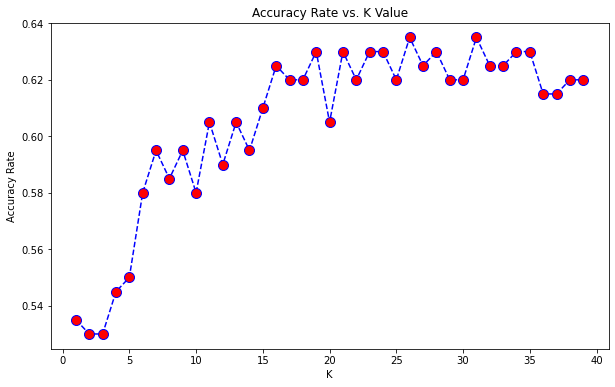

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=28')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=28


[[66 31]
 [48 55]]


0.605


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df['Purchased Bike'].value_counts()

0    519
1    481
Name: Purchased Bike, dtype: int64

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [ ]:
dt=DecisionTreeClassifier()
mymodel(dt)
dt.feature_importances_

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       153
           1       0.60      0.59      0.59       147

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



array([0.32379184, 0.04519282, 0.02692807, 0.04681394, 0.0605924 ,
       0.06782351, 0.05309701, 0.01439646, 0.07946996, 0.0688022 ,
       0.06515483, 0.14793695])

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.62      0.65      0.64       153
           1       0.62      0.59      0.60       147

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



DecisionTreeClassifier(max_depth=10)

In [ ]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.61
2: 0.6133333333333333
3: 0.57
4: 0.6033333333333334
5: 0.6
6: 0.6
7: 0.6133333333333333
8: 0.6266666666666667
9: 0.6133333333333333
10: 0.61
11: 0.6
12: 0.6066666666666667
13: 0.6033333333333334
14: 0.5866666666666667
15: 0.6066666666666667
16: 0.61
17: 0.6066666666666667
18: 0.6
19: 0.6266666666666667
20: 0.6233333333333333
21: 0.6133333333333333
22: 0.5866666666666667
23: 0.6
24: 0.5933333333333334
25: 0.6
26: 0.61
27: 0.6033333333333334
28: 0.6066666666666667
29: 0.5866666666666667
30: 0.62
31: 0.6
32: 0.6066666666666667
33: 0.6133333333333333
34: 0.6266666666666667
35: 0.5933333333333334
36: 0.6066666666666667
37: 0.6033333333333334
38: 0.6033333333333334
39: 0.6
40: 0.6266666666666667
41: 0.59
42: 0.6033333333333334
43: 0.62
44: 0.5933333333333334
45: 0.6
46: 0.6233333333333333
47: 0.5966666666666667
48: 0.58
49: 0.61


In [ ]:
dt3=DecisionTreeClassifier(max_depth=8)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.63      0.71      0.66       153
           1       0.65      0.56      0.60       147

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.63       300
weighted avg       0.64      0.64      0.63       300



DecisionTreeClassifier(max_depth=8)

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       153
           1       0.62      0.61      0.61       147

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.62
2: 0.62
3: 0.6233333333333333
4: 0.6033333333333334
5: 0.6266666666666667
6: 0.6533333333333333
7: 0.6333333333333333
8: 0.6033333333333334
9: 0.6133333333333333
10: 0.6233333333333333
11: 0.6466666666666666
12: 0.64
13: 0.6233333333333333
14: 0.6166666666666667
15: 0.6066666666666667
16: 0.58
17: 0.5833333333333334
18: 0.5766666666666667
19: 0.58
20: 0.5866666666666667
21: 0.5666666666666667
22: 0.5766666666666667
23: 0.5933333333333334
24: 0.56
25: 0.56
26: 0.5433333333333333
27: 0.55
28: 0.54
29: 0.5633333333333334
30: 0.5733333333333334
31: 0.5733333333333334
32: 0.5466666666666666
33: 0.5566666666666666
34: 0.5566666666666666
35: 0.5566666666666666
36: 0.57
37: 0.57
38: 0.57
39: 0.5766666666666667
40: 0.5766666666666667
41: 0.5766666666666667
42: 0.5766666666666667
43: 0.58
44: 0.5633333333333334
45: 0.6033333333333334
46: 0.6066666666666667
47: 0.5833333333333334
48: 0.5833333333333334
49: 0.58
50: 0.58
51: 0.58
52: 0.58
53: 0.58
54: 0.58
55: 0.6033333333333334
56: 0.5933

In [ ]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=6)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       153
           1       0.66      0.60      0.63       147

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



DecisionTreeClassifier(min_samples_leaf=6)

In [ ]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=11,max_depth=8)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       153
           1       0.65      0.61      0.63       147

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=11)

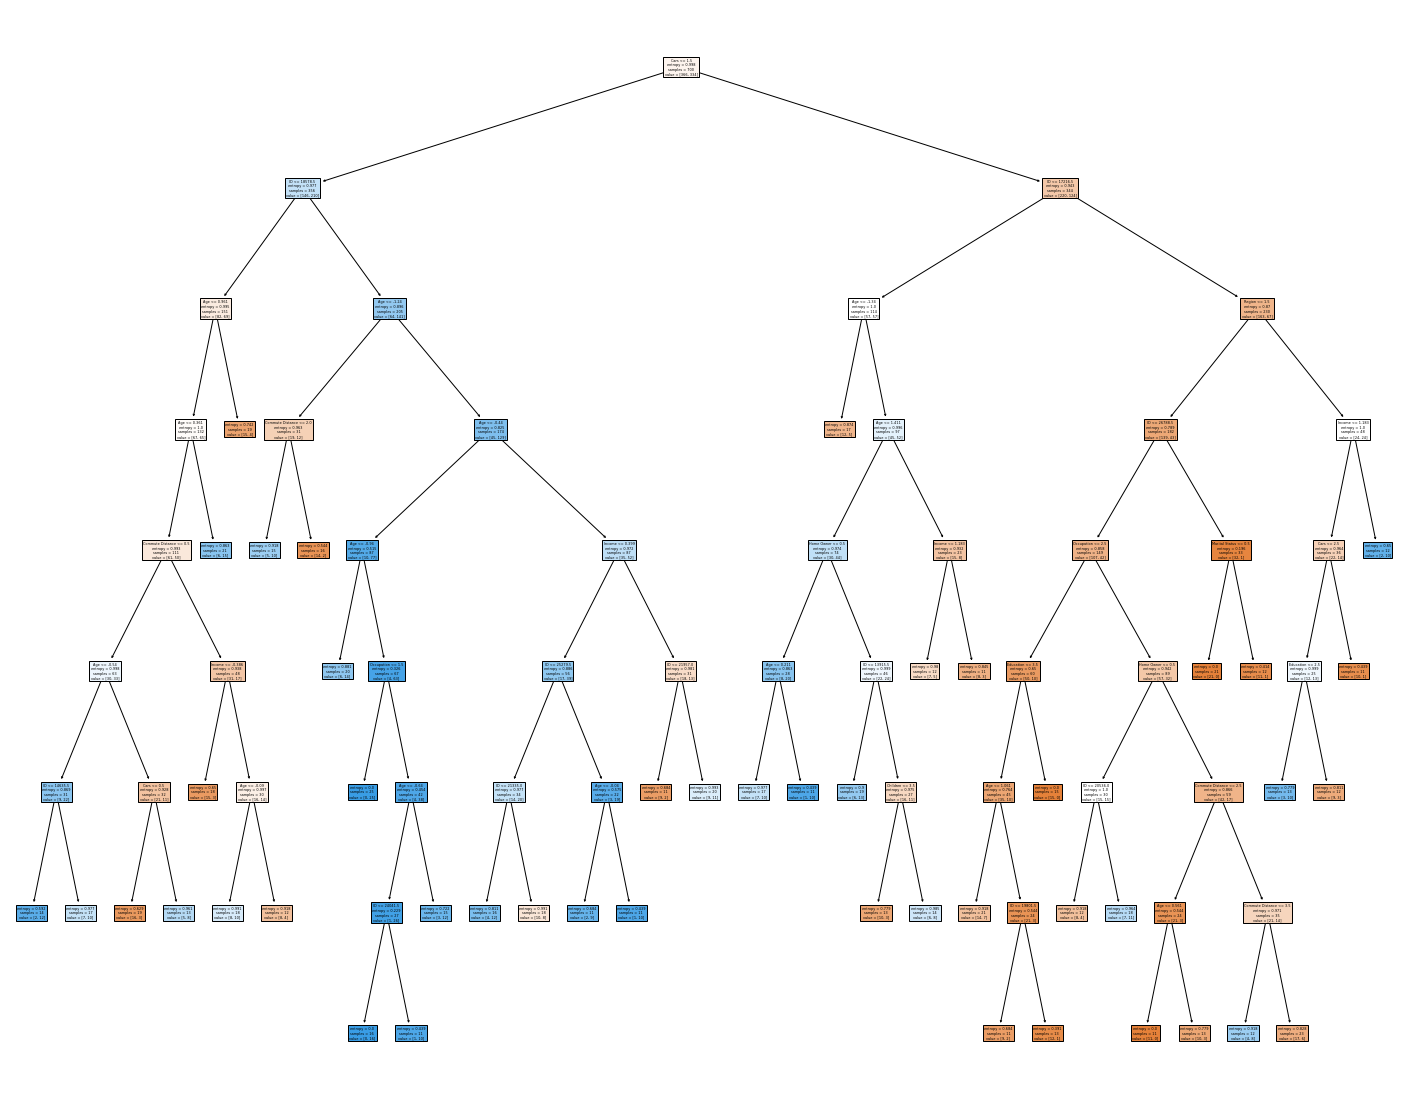

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(dt7,filled=True,feature_names=x.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 8,9,20,41],
          'min_samples_leaf' : [6,7,11,12],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [ ]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 20, 41],
                         'min_samples_leaf': [6, 7, 11, 12]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7}

In [ ]:
my_best_preds = grid_search.predict(xtest)

In [ ]:
accuracy_score(ytest, my_best_preds)

0.6333333333333333

In [ ]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       153
           1       0.63      0.60      0.62       147

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300

